# 项目 4: 探索数据集 -- 泰坦尼克号
数据包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。


## 提出想要分析的问题：
- 存活率与哪些因素有关
- 据说船长在最后一刻下命令妇女，儿童优先上船，分析一下具体情况
- 同伴多少对生存率有什么影响
- 有钱人和穷人的生存率对比情况

## 数据加工：

### 数据获取：

In [440]:
# 导入需要用到的包

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline 

In [441]:
# 导入数据

df = pd.read_csv(('titanic-data.csv'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


数据样本中包含以下特征：
- **Survived**：是否存活（0代表否，1代表是）
- **Pclass**：社会阶级（1代表上层阶级，2代表中层阶级，3代表底层阶级）
- **Name**：船上乘客的名字
- **Sex**：船上乘客的性别
- **Age**:船上乘客的年龄（可能存在 `NaN`）
- **SibSp**：乘客在船上的兄弟姐妹和配偶的数量
- **Parch**：乘客在船上的父母以及小孩的数量
- **Ticket**：乘客船票的编号
- **Fare**：乘客为船票支付的费用
- **Cabin**：乘客所在船舱的编号（可能存在 `NaN`）
- **Embarked**：乘客上船的港口（C 代表从 Cherbourg 登船，Q 代表从 Queenstown 登船，S 代表从 Southampton 登船）


### 数据清洗

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### 填充缺失值
一共12列，891行数据，其中：
- Age只有714行有数据，有177名乘客数据缺失--将缺失数据补0
- Cabin只有204行有数据，有687名乘客数据缺失--缺失数据太多，忽略
- Embarked有889行数据，只有2名乘客数据缺失，用人数最多的登录港口补全

In [443]:
#将年龄空值填充0
df['Age'].fillna(df['Age'].mean(), inplace = True)   

In [444]:
#找出登录人数最多的港口
print df.groupby(['Embarked'])['PassengerId'].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64


In [445]:
#将Embarked空值用人数最多的港口S填充
df['Embarked'].fillna('S', inplace = True) 
print df.groupby(['Embarked'])['PassengerId'].count()

Embarked
C    168
Q     77
S    646
Name: PassengerId, dtype: int64


#### 将年龄，票价分段处理， 方便分类观察

In [446]:
#将年龄分段
bins_age = np.arange(0, 90, 10)
df['Age'] = pd.cut(df['Age'], bins_age)
df.groupby(['Age'])['PassengerId'].count()


Age
(0, 10]      64
(10, 20]    115
(20, 30]    407
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: PassengerId, dtype: int64

In [447]:
#将票价分段
bins_fare = np.arange(0, float(700), 100)
df['Fare'] = pd.cut(df['Fare'], bins_fare, include_lowest = True) #票价中有0，设置Include_lowest = True将其包括
df.groupby(['Fare'])['PassengerId'].count()


Fare
(-0.001, 100.0]    838
(100.0, 200.0]      33
(200.0, 300.0]      17
(300.0, 400.0]       0
(400.0, 500.0]       0
(500.0, 600.0]       3
Name: PassengerId, dtype: int64

In [448]:
# Parch和SibSp可以考虑合并在一起分析不同数量的同伴的生存率情况

df['Fellow'] = df['Parch'] + df['SibSp']

In [449]:
# 清洗完数据看看大概情况
df.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fellow
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,0.904602
std,257.353842,0.486592,0.836071,1.102743,0.806057,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,10.000000


通过以上信息，粗略来看没有其它数据异常，生存率为38.4%， 年龄和Fare由于分段计算，数值总体会偏大，但对分析没有影响。

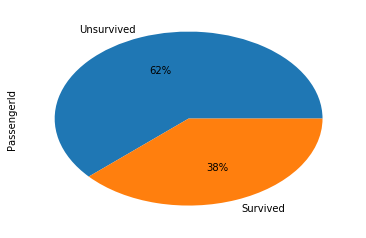

In [450]:
df.groupby(['Survived'])['PassengerId'].count().plot(kind = 'pie', autopct = '%.0f%%',labels = ['Unsurvived', 'Survived'])

plt.show()

## 探索数据
### 看看哪些特征对生存率影响较大

#### 单个特征分析

In [451]:
## 创建函数显示每种特征的

def show_survival_status(dfData, key):
    s1 = dfData.groupby([key]).sum()['Survived']
    s2 = dfData.groupby([key]).count()['Survived'] - s1
    df_status = pd.DataFrame({'Survived':s1, 'Not_Survived':s2})


    df_status.plot(kind = 'Bar', stacked = True)
      
    plt.xlabel(key)
    plt.ylabel('Number of Passengers')
    plt.title('Passenger Survival Statistics With \'%s\' Feature'%(key))


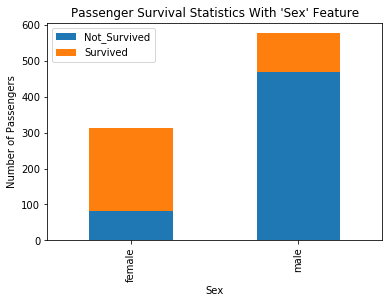

In [452]:
show_survival_status(df,'Sex')

性别对生存率有明显影响，其中女性生存率明显高于男性，可以再结合其它特征分析

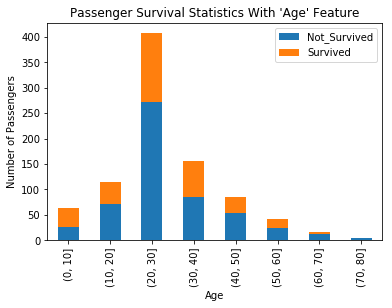

In [453]:
show_survival_status(df,'Age')

年龄特征对生存率有明显影响，年龄小于等于10岁的乘客生存率明显高于年龄大于10岁的乘客，年龄大于10的乘客生存率没有明显特点。

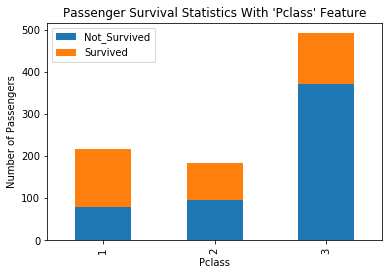

In [454]:
show_survival_status(df,'Pclass')

Pclass对生存率有明显影响，其中Pclass = 1，2 生存率明显高于Pclass = 3，可以结合分析性别的影响

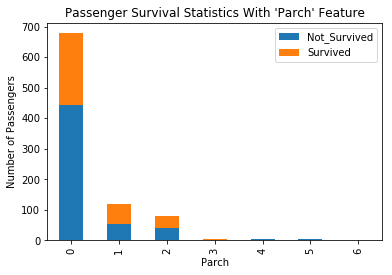

In [455]:
show_survival_status(df,'Parch')

Parch对生存率有明显影响，其中Parch=1，2明显高于其它

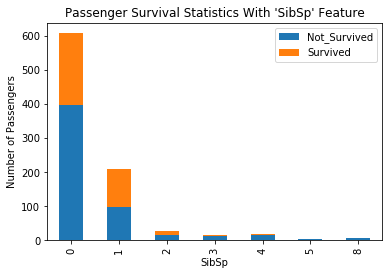

In [456]:
show_survival_status(df,'SibSp')

SibSp对生存率有明显影响，其中SibSp = 1,2明显高于其它

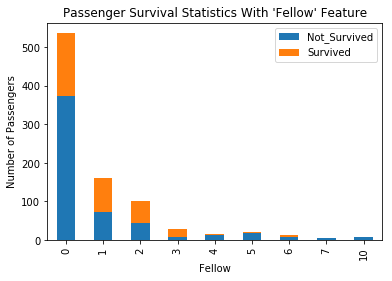

In [457]:
show_survival_status(df, 'Fellow')

综合来看，无论是Parch还是SibSp，Fellow总数在1~3个的生存率明显高于没有同伴或者是同伴数多于三个的情况

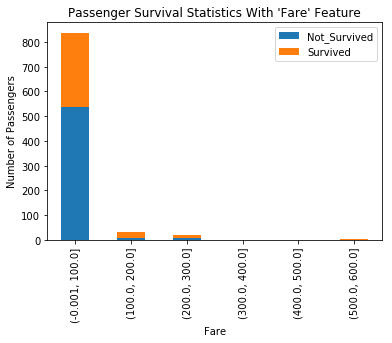

In [458]:
show_survival_status(df,'Fare')

绝大多数乘客票价小于100，而票价高于100的乘客生存率明显偏高，其中高于500的乘客生存率100%。看来富有阶层在灾难时刻还是拥有更多资源，稍后分析票价高于200的乘客中妇女和儿童的分布情况。

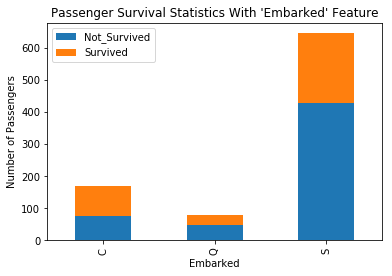

In [459]:
show_survival_status(df,'Embarked')

登录港口对生存率有明显影响，Embarked = C,Q的乘客生存率偏高

#### 多个特征结合分析

In [460]:
# 创建函数用来组合分析两个特征

def combine_two_features_analysis(df, keys):
    key1,key2 = keys[0],keys[1]
    key0_values = np.sort(df[keys[0]].unique())
    key1_values = np.sort(df[keys[1]].unique())
    n0 = len(key0_values)
    n1 = len(key1_values)
    y_max = (df.groupby([keys[0]])['Survived'].apply(np.shape).max()[0]/n1)*3  #计算yticks的最大值
    
    fig, axes = plt.subplots(ncols = n0, figsize = (2*n0*n1, 6)) #创建n0个子表
    plt.tick_params(labelcolor=(0,0,0,0), top='off', bottom='off', left='off', right='off') #取消重复的刻度
    for i in range(n0):
        for j in range(n1): 
            #获取feature keys[0]按照keys[1]分组统计的Survived人数
            sub_df = df[df[keys[0]]== key0_values[i]].groupby([df[keys[1]], df['Survived']]).size().unstack(fill_value = 0).rename(columns = lambda x:'Survival={}'.format(x))            
            m = str(1)+str(n0)+str(i+1) #图表Layout
            axes[i] = fig.add_subplot(int(m))
            pd.DataFrame(sub_df).plot(kind = 'Bar', stacked = True, ax = axes[i]) #在第i个子表中绘制图标
            axes[i].legend(['Unsurvived', 'Survived'], loc = 'best')
            axes[i].set_title(u'Sex = %s'%(key0_values[i]))
            axes[i].set_yticks(np.arange(0, y_max, y_max/4))
            
    plt.show()
    

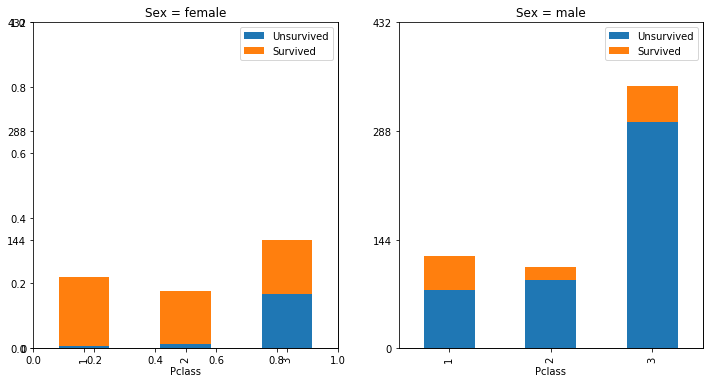

In [461]:
combine_two_features_analysis(df, ['Sex','Pclass'])

- 女性在各种舱等级生存率都偏高，尤其是1，2级
- 男性在各种等级舱生存率都偏低，尤其是3级

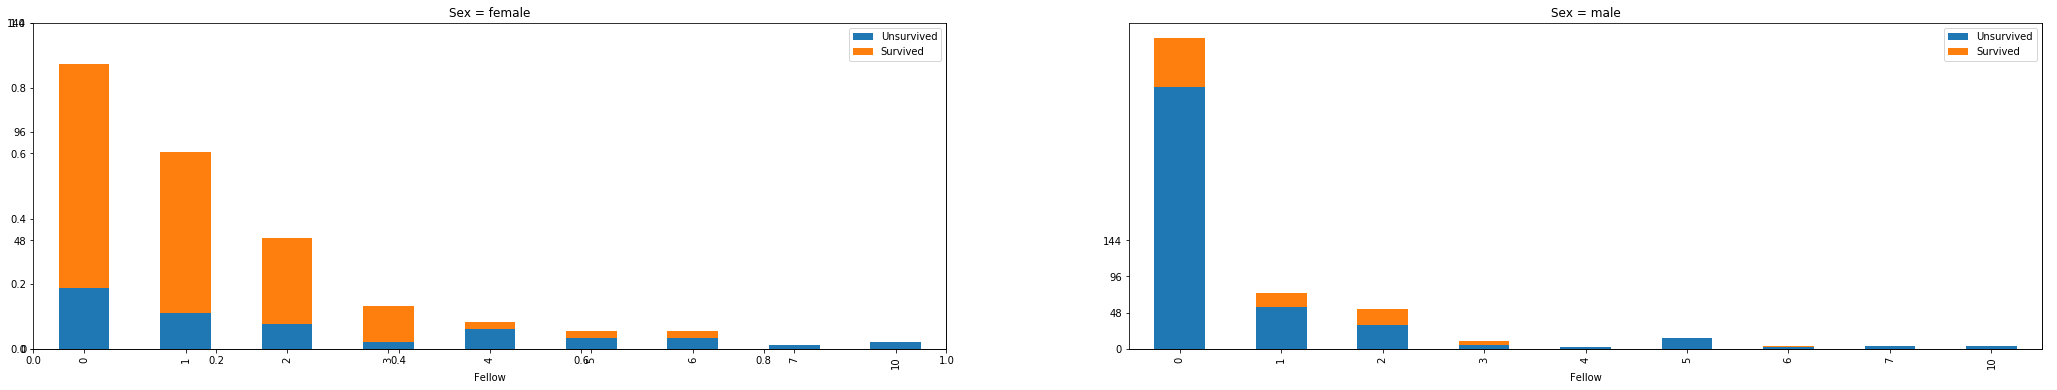

In [462]:
combine_two_features_analysis(df, ['Sex','Fellow'])

- 独身女性和有1~3个同伴的女性生存率较高
- 有1~2个同伴的男性生存率较高

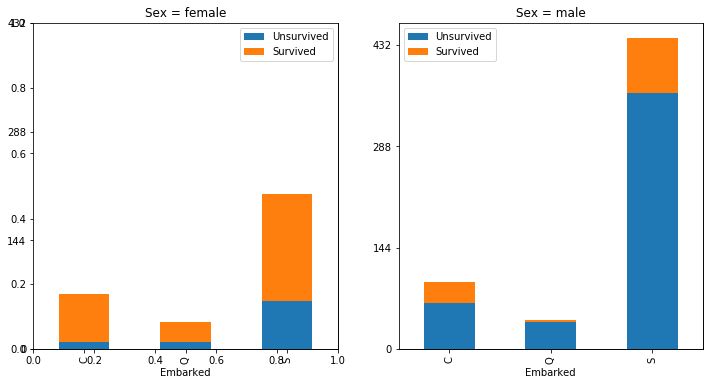

In [463]:
combine_two_features_analysis(df, ['Sex','Embarked'])


仍然是C，Q两地登录的船员生存率较高，女性总体偏高

In [464]:
# 创建函数分析多个feature对生存率的影响，其中第一个feature为categorical类型

def combine_two_features_analysis_with_one_categorical(df, keys):
    df.groupby(keys)['Survived'].mean().unstack().plot(kind = 'Bar')
    plt.title('%s VS %s VS Survival Rate'%(keys[0], keys[1]))
    plt.ylabel('Survival Rate')
    plt.show()

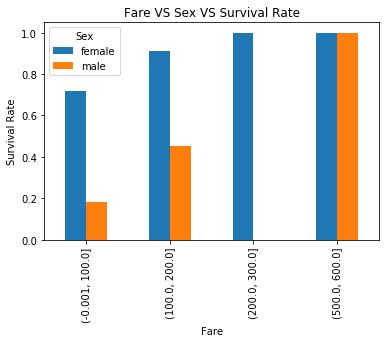

In [465]:
combine_two_features_analysis_with_one_categorical(df, ['Fare', 'Sex'])

- 女性在各种票价段生存率都偏高，特别是200，300，600票价段
- 男性在各种票价段生存率都偏低，600票价段除外

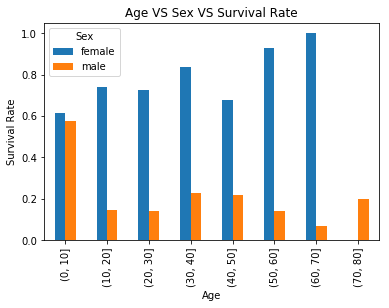

In [466]:
combine_two_features_analysis_with_one_categorical(df, ['Age', 'Sex'])

- 女性在各个年龄段生存率都很高，特别是60，70的高龄年龄段
- 男性各个年龄段的生存率都偏低，但是10岁以下的年龄段和80的高龄段生存率相对偏高

## 得出结论
- 以上分析只是基于泰坦尼克号2224 名乘客和船员中 891 名的的样本进行的分析，以下所得结论与实际整体情况可能所有偏差。
- 泰坦尼克号891名样本的生存率约为39%
- 生存率与性别的关系：女性的存活率是男性的3倍。
- 生存率与Pclass，Fare的关系，Pclass等级越高，Fare价格越高，生存率越高。其中顶级富豪票价在500以上的富豪无论男女全部幸存。
- 生存率与年龄的关系：女性70岁以上的生存率100%，男性10岁以下生存率明显偏高
- 生存率与同伴书的关系：无论男女，有1~3个同伴生存率明显偏高，而独身的女性生存率也较高。出去玩最好有1~3个同伴会更安全，同时独身的女性总是会受到更多照顾。
- 生存率与Embarked的关系：C,Q,S三地的存活率依次下降，可能C地的人身体更强壮，或者更团结，或者更有钱乘坐了较高等级船舱，目前不得而知，是否相关需要更深入的分析
- 891名的船员的数据样本中Age缺失177项，用平均值替代，Embarked缺失2项，用众数代替。这些也会导致分析结果有所偏差。
- 除此之外，Name， Ticket， Cabin这些项可能包含对生存率有影响的特征，Cabin数据缺失太多，Name和Ticket没有进行更进一步的特征提取而没有进行分析。
- 以上分析只是基于可视化图表的简单分析，结论都只是暂时的。
